# Confusable Detector

Tutorial for using confusable detector.

## Setup

### Install required packages

In [1]:
! ./scripts/setup.sh

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease 
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [66.4 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [9092 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [861 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [958 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1392 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [1253 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [20.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [80.7 kB]

Setting up libpng16-16:amd64 (1.6.34-1ubuntu0.18.04.2) ...
Setting up fonts-dejavu-core (2.37-1) ...
Setting up libbsd0:amd64 (0.8.7-1ubuntu0.1) ...
Setting up ucf (3.0038) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76.)
debconf: falling back to frontend: Readline
Setting up libfreetype6:amd64 (2.8.1-2ubuntu2) ...
Setting up libpixman-1-0:amd64 (0.34.0-2) ...
Setting up libxdmcp6:amd64 (1:1.1.2-3) ...
Setting up x11-common (1:7.7+19ubuntu7.1) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76.)
debconf: falling back to frontend: Readline
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
invoke-rc.d: could not determine current runleve

### Install fonts

In [2]:
! apt-get install -y fonts-noto-cjk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 55.7 MB of archives.
After this operation, 92.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk all 1:20190409+repack1-0ubuntu0.18.04 [55.7 MB]
Fetched 55.7 MB in 6s (9928 kB/s)         
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 16508 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20190409+repack1-0ubuntu0.18.04_all.deb ...
Unpacking fonts-noto-cjk (1:20190409+repack1-0ubuntu0.18.04) ...
Setting up fonts-noto-cjk (1:20190409+repack1-0ubuntu0.18.04) ...


## Generate Visualizations

In [3]:
from vis_gen import VisGen
vg = VisGen()

### Properties (settings)

In [4]:
vg.font_name

'Noto Sans CJK SC'

In [5]:
vg.font_size

36

In [6]:
vg.image_size

40

In [7]:
vg.out_dir

'img_out'

In [8]:
vg.grayscale

False

### Visualize single code point

In [9]:
vg.visualize_single('\u4e00')

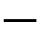

In [10]:
from IPython.display import Image, display
display(Image(filename='img_out/Noto_Sans_CJK_SC/19968.png'))

### Visualize range of code points

In [11]:
vg.visualize_range(start='\u4e05', end='\u4e09')

Visualizing 5 total code points from 丅 to 三.
Now writing 1st code point.
Finished.
Images stored in directory /tf/img_out/Noto_Sans_CJK_SC.


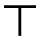

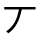

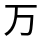

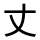

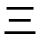

In [12]:
for i in range(ord('\u4e05'), ord('\u4e09')+1):
    display(Image(filename='img_out/Noto_Sans_CJK_SC/'+str(i)+'.png'))

## Distance Calculation

In [14]:
from distance_metrics import Distance, ImgFormat
distance = Distance(img_format=ImgFormat.RGB)

### List all image formats

In [15]:
list(ImgFormat)

[<ImgFormat.RGB: 1>,
 <ImgFormat.A8: 2>,
 <ImgFormat.A1: 3>,
 <ImgFormat.EMBEDDINGS: 4>]

### Get supported distance metrics for RGB image

In [19]:
metrics = distance.get_metrics()
metrics.keys()

dict_keys(['naive'])

### Calculate distance between two images

In [17]:
d = distance.calculate_from_path(metric=metrics['naive'], path1='img_out/Noto_Sans_CJK_SC/19973.png', 
                             path2='img_out/Noto_Sans_CJK_SC/19974.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19974), d))

Distance between 丅 and 丆 is 22.803125000000005


In [18]:
d = distance.calculate_from_path(metric=metrics['naive'], path1='img_out/Noto_Sans_CJK_SC/19973.png', 
                             path2='img_out/Noto_Sans_CJK_SC/19976.png')
print('Distance between {} and {} is {}'.format(chr(19973), chr(19976), d))

Distance between 丅 and 丈 is 44.99
